<a href="https://colab.research.google.com/github/bimal-bp/customer-segmentation-analysis-product-recommender-system.ipynb/blob/ML_MODELS/customer_segmentation_analysis_product_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi! in this project i am going to explore segementation,sentiment analysis and in last product recommondation.

In [2]:
# import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import folium
from sklearn.preprocessing import StandardScaler
from geopy.geocoders import Nominatim, GoogleV3
from folium.plugins import MarkerCluster
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS  # Fix: wordCloud to WordCloud
from textblob import TextBlob
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.decomposition import TruncatedSVD  # Fix: TruncatedSVD to import correctly

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
geo = pd.read_csv('/content/drive/My Drive/geolocation_olist_public_dataset.csv')
order = pd.read_csv('/content/drive/My Drive/olist_public_dataset_v2.csv')
cust = pd.read_csv('/content/drive/My Drive/olist_public_dataset_v2_customers.csv')
pay = pd.read_csv('/content/drive/My Drive/olist_public_dataset_v2_payments.csv')
trans = pd.read_csv('/content/drive/My Drive/product_category_name_translation.csv')

# **Geo Location Exploration**

1.Market Distribution

In [5]:
geo.head(5)

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,sp,-23.547807,-46.636122
1,10,sao paulo,sp,-23.546081,-46.644820
2,10,sao paulo,sp,-23.540984,-46.642569
3,10,sao paulo,sp,-23.546758,-46.645771
4,10,sao paulo,sp,-23.546362,-46.643073


In [6]:
geo.shape

(323016, 5)

In [7]:
geo.isnull().sum().sum()

0

In [8]:
geo.duplicated().sum()

47162

In [9]:
geo=geo.drop_duplicates(subset=None,keep= 'first',inplace=False)

In [10]:
centroid = geo.groupby('zip_code_prefix').agg({
    'lat':'median',
    'lng':'median',
    'city':pd.Series.mode
}).reset_index()
centroid['count']=geo.groupby('zip_code_prefix').size().reset_index(
    name='counts')['counts']

# **Revenue Distribution**




In [11]:
order.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [12]:
order.isnull().sum().sum()

151672

In [13]:
order.duplicated().sum()

0

In [14]:
geo_order=pd.merge(centroid,order,how='right',left_on='zip_code_prefix',right_on='customer_zip_code_prefix')

In [15]:
geo_order

,zip_code_prefix,lat,lng,city,count,order_id,order_status,order_products_value,order_freight_value,order_items_qty,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,832.0,-25.566300,-48.535767,paranagua,461.0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,384.0,-18.914447,-48.273060,uberlandia,468.0,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,66.0,-23.543840,-46.919561,itapevi,450.0,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,743.0,-16.721129,-49.319393,goiania,376.0,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,511.0,-8.109106,-34.909649,recife,277.0,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.0,-12.128259,-45.085241,luis eduardo magalhaes,396.0,5e0fb4a48b36946c8121f9e03964d9c2,delivered,198.00,91.98,2,...,36,450,1,08574b074924071f4e201e151b152b4e,5e0fb4a48b36946c8121f9e03964d9c2,5,NaN,show,2017-10-12 00:00:00.000000,2017-10-12 19:53:25+00:00
99996,61.0,-23.547684,-46.804533,osasco,428.0,138d22c05c5e456f19bdc7dcf09b89aa,delivered,59.00,11.02,1,...,26,119,1,0cf573090c66bb30ac5e53c82bdb0403,138d22c05c5e456f19bdc7dcf09b89aa,5,NaN,NaN,2017-04-01 00:00:00.000000,2017-04-04 04:42:58+00:00
99997,132.0,-23.176724,-46.893261,jundiai,466.0,a97f1478d7e7648bf5bd2af02d1392a7,delivered,119.99,18.09,1,...,42,660,1,14555ba663de8689feacf1d0819cc3b3,a97f1478d7e7648bf5bd2af02d1392a7,5,NaN,recomendo,2017-06-25 00:00:00.000000,2017-06-27 22:11:50+00:00
99998,394.0,-16.719768,-43.865792,montes claros,481.0,7212b1926de631a35211dd5b4bd9d77b,delivered,119.99,18.09,1,...,33,659,1,cfd652b39b87b4e06cf4ea106a32db47,7212b1926de631a35211dd5b4bd9d77b,1,NaN,NaN,2017-09-20 00:00:00.000000,2017-09-25 21:22:57+00:00


In [16]:
geo_rev= geo_order.groupby('customer_zip_code_prefix').agg({
    'lat':'median',
    'lng':'median',
    'order_products_value':'sum'
}).reset_index()

In [17]:
geo_rev

,customer_zip_code_prefix,lat,lng,order_products_value
0,10,-23.545520,-46.636225,22141.32
1,11,-23.528066,-46.649218,15824.35
2,12,-23.540822,-46.654373,49393.22
3,13,-23.556829,-46.648644,35587.63
4,14,-23.567885,-46.663207,50151.29
...,...,...,...,...
846,995,-28.283429,-52.796518,5238.34
847,996,-27.643769,-52.805184,6109.82
848,997,-27.635800,-52.272991,6727.22
849,998,-27.770748,-51.807267,1851.91


# **Customer Distribution**

In [18]:
geo_order = geo_order.dropna(subset=['zip_code_prefix'])
geo_cust=geo_order.groupby('customer_zip_code_prefix').agg({
    'lat':'median',
    'lng':'median',
    'customer_id':'count'
}).reset_index()

In [19]:
import pandas as pd

# Assuming geo_cust is a DataFrame with columns lat, lng, customer_id
# You can replace this with your actual data

# Calculate customer density for each location
geo_cust['density'] = geo_cust.groupby(['lat', 'lng'])['customer_id'].transform('count')

# Get the top 20 locations with the highest customer density
top20_locations = geo_cust.drop_duplicates(['lat', 'lng']).nlargest(120, 'density')[['lat', 'lng']]

# Round the latitude and longitude values to 2 decimal places
top20_locations['lat'] = top20_locations['lat'].round(2)
top20_locations['lng'] = top20_locations['lng'].round(2)

print(top20_locations)


       lat    lng
0   -23.55 -46.64
1   -23.53 -46.65
2   -23.54 -46.65
3   -23.56 -46.65
4   -23.57 -46.66
..     ...    ...
115 -21.48 -47.37
116 -20.90 -47.59
117 -20.53 -47.40
118 -20.31 -47.79
119 -20.72 -47.87

[120 rows x 2 columns]


**CONCLUSION**:

- As shown above, there are three main hotspots with highest number of customer. These hotspots are located at approximately:

lat:-23, lng:-46

lat: -22, lng:-43

lat: -19, lng:-43

Note that the location of these hotspots approximately near with the previous hotspots, so we can assume that these hotspots are simmiliarly the same. With higher number of customer, these places would great place to expand your market because of customer's interest with this market.

# **Time Period Exploration**

- In this session we will analyze the accuracy that comapny estimate for delivery time moreover . checking delivery is late and early

In [20]:
geo_order.columns

Index(['zip_code_prefix', 'lat', 'lng', 'city', 'count', 'order_id',
       'order_status', 'order_products_value', 'order_freight_value',
       'order_items_qty', 'order_sellers_qty', 'order_purchase_timestamp',
       'order_aproved_at', 'order_estimated_delivery_date',
       'order_delivered_customer_date', 'customer_id', 'customer_city',
       'customer_state', 'customer_zip_code_prefix', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [21]:
geo_order['order_delivered_customer_date'] = pd.to_datetime(
    geo_order['order_delivered_customer_date']
)
geo_order['order_estimated_delivery_date']=pd.to_datetime(
    geo_order['order_estimated_delivery_date']
)

<ipython-input-21-dbdca3e889cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_order['order_delivered_customer_date'] = pd.to_datetime(
<ipython-input-21-dbdca3e889cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_order['order_estimated_delivery_date']=pd.to_datetime(


In [22]:
geo_order.isnull().sum()

zip_code_prefix                      0
lat                                  0
lng                                  0
city                                 0
count                                0
order_id                             0
order_status                         0
order_products_value                 0
order_freight_value                  0
order_items_qty                      0
order_sellers_qty                    0
order_purchase_timestamp             0
order_aproved_at                    18
order_estimated_delivery_date        0
order_delivered_customer_date     2405
customer_id                          0
customer_city                        0
customer_state                       0
customer_zip_code_prefix             0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_id                           0
review_id                            0
review_score             

- As order can be canceled after the purches , there are empty element on delivery date column

In [23]:
geo_order = geo_order.dropna(subset=['order_delivered_customer_date'])

In [24]:
geo_order['range_time'] = (geo_order['order_delivered_customer_date']-
                           geo_order['order_estimated_delivery_date']).astype('timedelta64[D]')

<ipython-input-24-1356c62b0e58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_order['range_time'] = (geo_order['order_delivered_customer_date']-


- We will find how many customers got deliver early or late

In [25]:
delay= geo_order['range_time'][geo_order['range_time']>0]
early = abs(geo_order['range_time'][geo_order['range_time']<0])

In [26]:
geo_order.head()

,zip_code_prefix,lat,lng,city,count,order_id,order_status,order_products_value,order_freight_value,order_items_qty,...,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,range_time
0,832.0,-25.566300,-48.535767,paranagua,461.0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,...,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,-37.0
1,384.0,-18.914447,-48.273060,uberlandia,468.0,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,...,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00,-19.0
2,66.0,-23.543840,-46.919561,itapevi,450.0,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,...,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00,-29.0
3,743.0,-16.721129,-49.319393,goiania,376.0,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,...,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00,0.0
4,511.0,-8.109106,-34.909649,recife,277.0,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,...,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00,-20.0


In [27]:
# Early delivery

bins= [0,3,7,14,30,90]
labels=['1-3 days','4-7 days','7-14 days','14-30 days','more than 1 month']
early= pd.cut(early,bins=bins,labels=labels)

<Axes: xlabel='count', ylabel='range_time'>

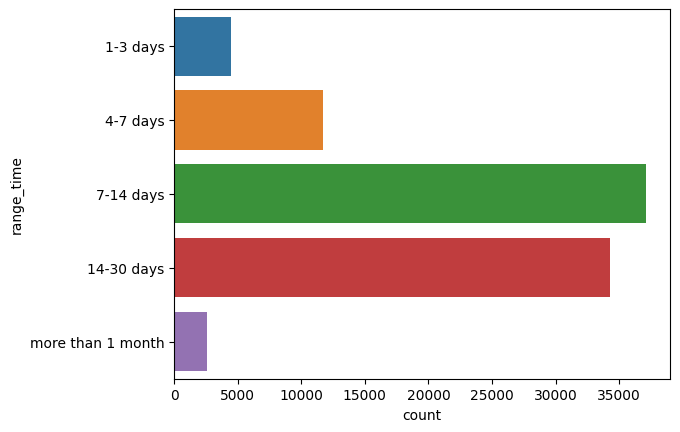

In [28]:
sns.countplot(y=early)

- It is shown above, that the early delivery mainly in 7-14 days and 14-30 days. However, even it is might be good for the customer to got an early delivery, it also shows the high inaccuracy of the delivery estimation. This issue also can impacting customer to consider cancel the order due to longer estimated delivery date.

In [29]:
# Delay delivery
delay = pd.cut(delay,bins=bins,labels=labels)

<Axes: xlabel='count', ylabel='range_time'>

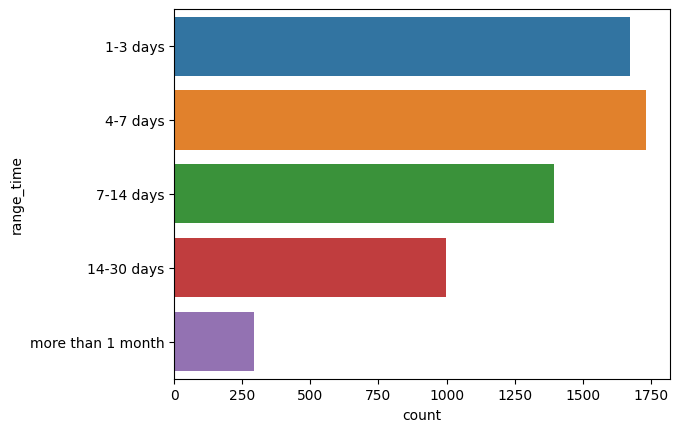

In [30]:
sns.countplot(y=delay)

- It is shown above, that the delivery delay mainly in 4-7 days and 1-3 days. This is could be company consideration to check the delivery estimator, since there is a lot day customer in 4-7 days. Moreover, there are some delayed delivery above 1 month, this would reduce customer satisfaction significanlly.

In [31]:
geo_order['range_time_default'] = geo_order['range_time'].apply(
    lambda x:1 if x > 0 else 0
)

In [32]:
geo_order.head()

,zip_code_prefix,lat,lng,city,count,order_id,order_status,order_products_value,order_freight_value,order_items_qty,...,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,range_time,range_time_default
0,832.0,-25.566300,-48.535767,paranagua,461.0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,...,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,-37.0,0
1,384.0,-18.914447,-48.273060,uberlandia,468.0,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,...,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00,-19.0,0
2,66.0,-23.543840,-46.919561,itapevi,450.0,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,...,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00,-29.0,0
3,743.0,-16.721129,-49.319393,goiania,376.0,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,...,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00,0.0,0
4,511.0,-8.109106,-34.909649,recife,277.0,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,...,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00,-20.0,0


In [33]:
delay_place=geo_order.groupby('zip_code_prefix').agg({
    'lat':'median',
    'lng':'median',
    'range_time_default':'mean'
})

In [34]:
import plotly.express as px

fig = px.density_mapbox(
    lat=delay_place.lat,
    lon=delay_place.lng,
    z=delay_place.range_time_default,
    radius=10,
    center=dict(lon=-50, lat=-16),
    zoom=2.8,
    mapbox_style='stamen-terrain'
)

fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()


As shown above, there are five hotspots with high rates of delayed delivery, which located at:

lat:-22, lng:-43

lat:-23, lng:-46

lat:-8, lng:-35

lat:-29, lng:-52

lat:-12, lng:-3

In [35]:
normal = geo_order['range_time'][geo_order['range_time'] == 0]
print('normal:',
      round(normal.count() * 100 / geo_order['range_time'].count(),
            3), '%', '\nearly:',
      round(early.count() * 100 / geo_order['range_time'].count(), 3), '%',
      '\ndelay:',
      round(delay.count() * 100 / geo_order['range_time'].count(), 3), '%')

normal: 1.259 % 
early: 92.44 % 
delay: 6.247 %


- As we can see, the number of exact the percentage on early product is very high, approximately 92,5%. High number of early delivery might satisfy the customer, but shows inaccuracy of delivery time estimator. Moreover, even if the delay percentage is low, this should be the company concern since there are some order that have delayed delivery more than one month. As an analyst, I strongly suggest the company to improve the delivery time estimator since only 1% of customer predicted accurately.

Promotion timing

- This sestion will analysze the best time to produce product or introduce new product

In [36]:
order['order_purchase_timestamp'] = pd.to_datetime(
    order['order_purchase_timestamp']
)

In [37]:
# best hour
best_time_hours= (order.order_purchase_timestamp).dt.hour

<ipython-input-38-d302ddd6c726>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

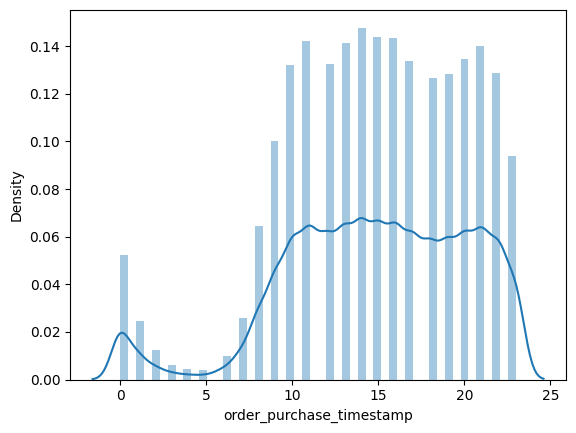

In [38]:
sns.distplot(best_time_hours)

- As shown above, most of the customers purchase products around 10 am until 22 pm.

In [39]:
# bestday
best_time_day=order.order_purchase_timestamp.apply(lambda x:x.weekday())

<ipython-input-40-122b31b99954>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




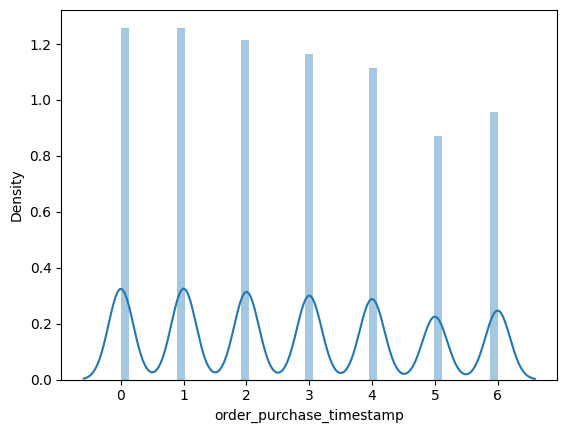

In [40]:
sns.distplot(best_time_day)
plt.show()

- As we can see, the highest number of purchase is on Tuesday(1), then Monday(0). However, even in other days the number of purchase not significanlly low, I recommend to avoid promote products in Saturday (5), since it is the lowest.

<ipython-input-41-c68922326b71>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




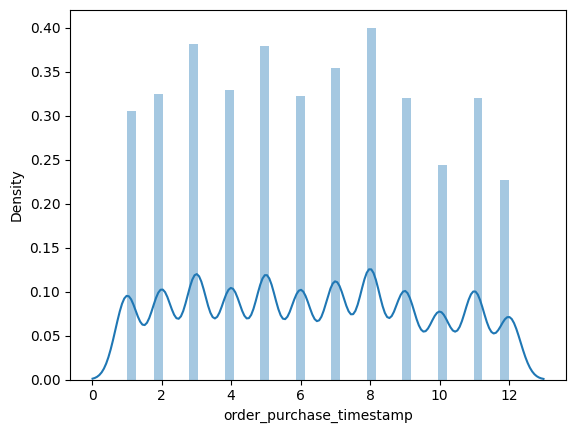

In [41]:
# best month
best_time_month = (order.order_purchase_timestamp).dt.month
sns.distplot(best_time_month)
plt.show()

- As shown above, the highest number of purchase in August (8). However, even in other days the number of purchase not significanlly low, I recommend to avoid promote products in December (12), since it is the lowest.

**CONCLUSION**:

- Conclusion
Based on the previous analysis, I recommend the company to promote or release new products on:

Hour: Around 10 am - 22 pm

Day: Tuesday, Monday

Month: August, February

It might be okay to promote on another time besides the time I mentioned above, since it is not significanlly different. However, there are some time with low number of purchase which the company should avoid:

Hour: Around 3 am - 5 am

Day: Saturday

Month: December, October

# **Customer Behaviour Exploration**

In [42]:
cust.head()

,customer_id,customer_unique_id
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff
2,00012a2ce6f8dcda20d059ce98491703,7e0e291c0f4fc2d69208954d26ed0586
3,000161a058600d5901f007fab4c27140,ff1dcb27ea444eddb94ea5fea77b875c
4,00017f1d6cce0d56046219a2cfabcbbb,237130c4b6717031ed62d9d0b16fd94f


In [43]:
cust=cust.drop_duplicates(subset=None,keep = 'first',inplace=False)

In [44]:
order_cust=pd.merge(cust,order,how='right',on='customer_id')

In [45]:
order_cust.head()

,customer_id,customer_unique_id,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,297dcf281305aabfee256d313076af2b,a27e24da3a7dc34713304a30896a3c4e,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,b7563d94162ed0aa3f8d9cada4bcc536,83c5f96adba9983897eb09729577aa6b,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,f102cb15ec41ca30fa2902da06495f6b,de5a83eec57b3ac456dca340651c030a,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,e33c250311160298e5b457ca52720a35,785b20b3b689b670e6b7e30f04eb6fdc,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,8a8f7c9a4450f17ba3ee25a5ba821bc7,539155c817eb96914de0b011b4d28d50,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [46]:
order_cust = order_cust.dropna(subset=['order_aproved_at'])
order_cust['order_aproved_at'] = pd.to_datetime(order_cust['order_aproved_at'])
order_cust['latest'] = max(order_cust.order_aproved_at)
order_cust['range_time'] = order_cust['latest'] - order_cust['order_aproved_at']
recent = order_cust.groupby('customer_unique_id').agg({
    'range_time':'min'
}).astype('timedelta64[D]')

<ipython-input-46-0b936bdcd9ff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
order_cust.head()

,customer_id,customer_unique_id,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,...,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,latest,range_time
0,297dcf281305aabfee256d313076af2b,a27e24da3a7dc34713304a30896a3c4e,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,...,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,2018-09-28 11:05:22.374345,604 days 08:24:00.824794
1,b7563d94162ed0aa3f8d9cada4bcc536,83c5f96adba9983897eb09729577aa6b,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,...,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00,2018-09-28 11:05:22.374345,382 days 15:01:50.839064
2,f102cb15ec41ca30fa2902da06495f6b,de5a83eec57b3ac456dca340651c030a,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,...,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00,2018-09-28 11:05:22.374345,605 days 17:33:56.936092
3,e33c250311160298e5b457ca52720a35,785b20b3b689b670e6b7e30f04eb6fdc,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,...,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00,2018-09-28 11:05:22.374345,200 days 16:34:44.442383
4,8a8f7c9a4450f17ba3ee25a5ba821bc7,539155c817eb96914de0b011b4d28d50,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,...,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00,2018-09-28 11:05:22.374345,521 days 02:59:41.968962


In [48]:
# to define total order by anyone
frequent = order_cust.groupby('customer_unique_id').agg({'order_items_qty':'sum'})

In [49]:
# to define monetary
monetary= order_cust.groupby('customer_unique_id').agg({'order_products_value':'sum'})

In [50]:
# to define teenure
tenure = order_cust.groupby('customer_unique_id').agg({
    'range_time':'max'
}).astype('timedelta64[D]')

In [51]:
# making rfm table
rfmt = pd.concat([recent,frequent,monetary,tenure],axis=1)
rfmt.columns=['recency','frequency','monatary','tenure']

In [52]:
rfmt.head()

,recency,frequency,monatary,tenure
customer_unique_id,,,,
000329c0b406d30f7e92fbd6a88a009e,577.0,1,18.90,577.0
0003418b36ed466545169cac383b59b4,355.0,1,58.90,355.0
000446ff827ee6397d0f00816d6a1fb2,342.0,1,105.00,342.0
0004983adf3647e6c0bf708af02e94e4,358.0,1,21.99,358.0
0004e8eb194ba10ce76319ad18b09a5c,184.0,2,70.00,184.0


In [53]:
round(rfmt.describe(),2)

,recency,frequency,monatary,tenure
count,92499.00,92499.00,92499.00,92499.00
mean,307.11,1.19,139.65,310.24
std,157.68,0.67,212.65,157.82
min,0.00,1.00,2.00,0.00
25%,188.00,1.00,49.00,191.00
50%,305.00,1.00,89.90,307.00
75%,428.00,1.00,155.42,432.00
max,742.00,25.00,14776.00,742.00


- Next, we want to rank each customer for each criteria. There will be rank 1 to 5, with rank 1 as the highest and rank 5 as the lowest.

In [54]:
label1 = [5, 4, 3, 2, 1]
label2 = [1, 2, 3, 4, 5]
rfmt['R'] = pd.qcut(rfmt['recency'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label1)
rfmt['F'] = pd.cut(rfmt['frequency'], bins=[0, 1, 2, 3, 5, 900], labels=label2)
rfmt['M'] = pd.qcut(rfmt['monatary'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label2)
rfmt['T'] = pd.qcut(rfmt['tenure'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label2)

In [55]:
rfmt = rfmt.reset_index()

In [56]:
best=rfmt[rfmt.R.isin([4,5])& rfmt.F.isin([4,5]) & rfmt.M.isin([4,5])]
best['segment'] = 'Best'

<ipython-input-56-3cde84ba8a47>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
loyal_spender= rfmt[rfmt['R'].isin([4,5]) & rfmt['F'].isin([2,3])& rfmt['M'].isin([2,3]) & rfmt['T'].isin([3,4,5])]
loyal_spender['segment'] = 'LOYAL SPENDER'

<ipython-input-57-a6dc4bc4383e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
potential_loyal = rfmt[rfmt['R'].isin([4,5]) & rfmt['F'].isin([2,3]) & rfmt['M'].isin([2,3]) & rfmt['T'].isin([1,2])]
potential_loyal['segment']= 'POTENTIAL LOYAL'

<ipython-input-58-f292c6842a12>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
new_cust = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([1])
                & rfmt['M'].isin([1]) & rfmt['T'].isin([1, 2])]
new_cust['segment'] = 'NEW CUSTOMER'

<ipython-input-59-9ef4f29c15ea>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
loyal_cust = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([1])
                  & rfmt['M'].isin([1]) & rfmt['T'].isin([3, 5])]
loyal_cust['segment'] = 'LOYAL CUSTOMER'

In [61]:
promising = rfmt[rfmt['R'].isin([2, 3]) & rfmt['F'].isin([3, 5])
                 & rfmt['M'].isin([3, 5])]
promising['segment'] = 'PROMISING'

<ipython-input-61-9e25dbeef804>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
cant_lose = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([4, 5])
                 & rfmt['M'].isin([4, 5])]
cant_lose['segment'] = 'CAN NOT LOSE'

<ipython-input-62-f82cae00334a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
about_to_sleep = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([4, 5])
                      & rfmt['M'].isin([4, 5])]
about_to_sleep['segment'] = 'ABOUT TO SLEEP'

<ipython-input-63-3a1891ece5e0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
hibernating = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([2, 3])
                   & rfmt['M'].isin([2, 3])]
hibernating['segment'] = 'HIBERNATING'

<ipython-input-64-bf27bc16bda2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
lost = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([1]) & rfmt['M'].isin([1])
            & rfmt['T'].isin([1])]
lost['segment'] = 'HIBERNATING'

In [66]:
rfmt_segment = pd.concat([
    best, loyal_spender, potential_loyal, new_cust, loyal_cust, promising,
    cant_lose, about_to_sleep, hibernating, lost
])

In [67]:
rfmt_segment.sample(10)

,customer_unique_id,recency,frequency,monatary,tenure,R,F,M,T,segment
47393,82abc7f3c00b35458ab115d708b8b0ef,254.0,1,35.99,254.0,4,1,1,2,NEW CUSTOMER
29375,5129c3382626fae48715b5c997975375,105.0,1,31.40,105.0,5,1,1,1,NEW CUSTOMER
49916,89d114feaabfb9f223dc57937636f692,141.0,1,19.90,141.0,5,1,1,1,NEW CUSTOMER
86553,ef561513d9f0dd886827b8cb11f62390,138.0,1,25.99,138.0,5,1,1,1,NEW CUSTOMER
2802,07ce389a3c9415dd64e625f0549860c1,472.0,4,677.60,472.0,1,4,5,5,ABOUT TO SLEEP
31188,562a000150dd65a12931fbf4239c9957,570.0,5,114.50,570.0,1,4,4,5,CAN NOT LOSE
35975,637003677674e1a13bdb615911925db8,63.0,1,26.57,63.0,5,1,1,1,NEW CUSTOMER
29902,52a31756448b3321962a904405b3e45e,239.0,2,108.99,272.0,4,2,3,3,LOYAL SPENDER
60007,a613a9532309f240bcac60dd1f21d294,18.0,1,19.02,18.0,5,1,1,1,NEW CUSTOMER
286,00cc1370ee7124143d609f880316b20c,183.0,1,25.84,183.0,4,1,1,2,NEW CUSTOMER


**i. Best Customer**

- For this category, to keep this customer interest with your company, It is recommended to give ***award for any purchased product***, such as point that may interest them to buy things at your company. This point can be exhange with discount or any other things that may interest them

**ii. Loyal Spender**

- ame as previous category, to keep the customer spending on your company, you can*** give points for particular purchase***. With particular point accumulation, they can ranked up to 'best customer' category.

**iii. Loyal Customer**

- This customer have been loyal to the company.However, this customer better to be appriciated, I suggest the company may give this customer few incentive.

**iv. About To Sleep**

This customer have frequently purchased at this company. However, it is been a long time since this customer purchased at this company. I recommend the company to ***promote the company or the product*** to notify this customer to shop more at this company.

**v. Lost**

- For this kind of customer, the customer is too far to approach because of lack interest at this company. So, I suggest ***to not promote*** the company to this category of customer, since the customer have already lost and cost of promotion to get them back will be high.



 **Conclusion**
- I recommend to take appropriate marketing action based on the segment of customer to keep them enganged and keep generating profit.

# **IV. Product Exploration**

- This section will focus on exploring the popularity of product. Before we analyze, let's take a look at product translation dataset.

In [68]:
trans.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


- I would like to translate the product category from portugese to english. So, I will join the order and trans dataset based on product category name.

In [69]:
order_trans= pd.merge(trans,order,how='right',on='product_category_name')
order_en = order_trans.drop(['product_category_name'], axis=1)

In [70]:
order_en

,product_category_name_english,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,health_beauty,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,computers_accessories,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,auto,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,bed_bath_table,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,furniture_decor,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,garden_tools,5e0fb4a48b36946c8121f9e03964d9c2,delivered,198.00,91.98,2,1,2017-10-02 20:19:43,2017-10-04 02:43:52.408623,2017-10-31 00:00:00.000000,...,36,450,1,08574b074924071f4e201e151b152b4e,5e0fb4a48b36946c8121f9e03964d9c2,5,NaN,show,2017-10-12 00:00:00.000000,2017-10-12 19:53:25+00:00
99996,telephony,138d22c05c5e456f19bdc7dcf09b89aa,delivered,59.00,11.02,1,1,2017-03-22 06:13:55,2017-03-22 06:13:55.000000,2017-04-10 00:00:00.000000,...,26,119,1,0cf573090c66bb30ac5e53c82bdb0403,138d22c05c5e456f19bdc7dcf09b89aa,5,NaN,NaN,2017-04-01 00:00:00.000000,2017-04-04 04:42:58+00:00
99997,sports_leisure,a97f1478d7e7648bf5bd2af02d1392a7,delivered,119.99,18.09,1,1,2017-06-10 20:12:12,2017-06-10 21:32:48.260831,2017-07-05 00:00:00.000000,...,42,660,1,14555ba663de8689feacf1d0819cc3b3,a97f1478d7e7648bf5bd2af02d1392a7,5,NaN,recomendo,2017-06-25 00:00:00.000000,2017-06-27 22:11:50+00:00
99998,cool_stuff,7212b1926de631a35211dd5b4bd9d77b,delivered,119.99,18.09,1,1,2017-09-12 10:24:08,2017-09-12 10:35:15.542788,2017-10-02 00:00:00.000000,...,33,659,1,cfd652b39b87b4e06cf4ea106a32db47,7212b1926de631a35211dd5b4bd9d77b,1,NaN,NaN,2017-09-20 00:00:00.000000,2017-09-25 21:22:57+00:00


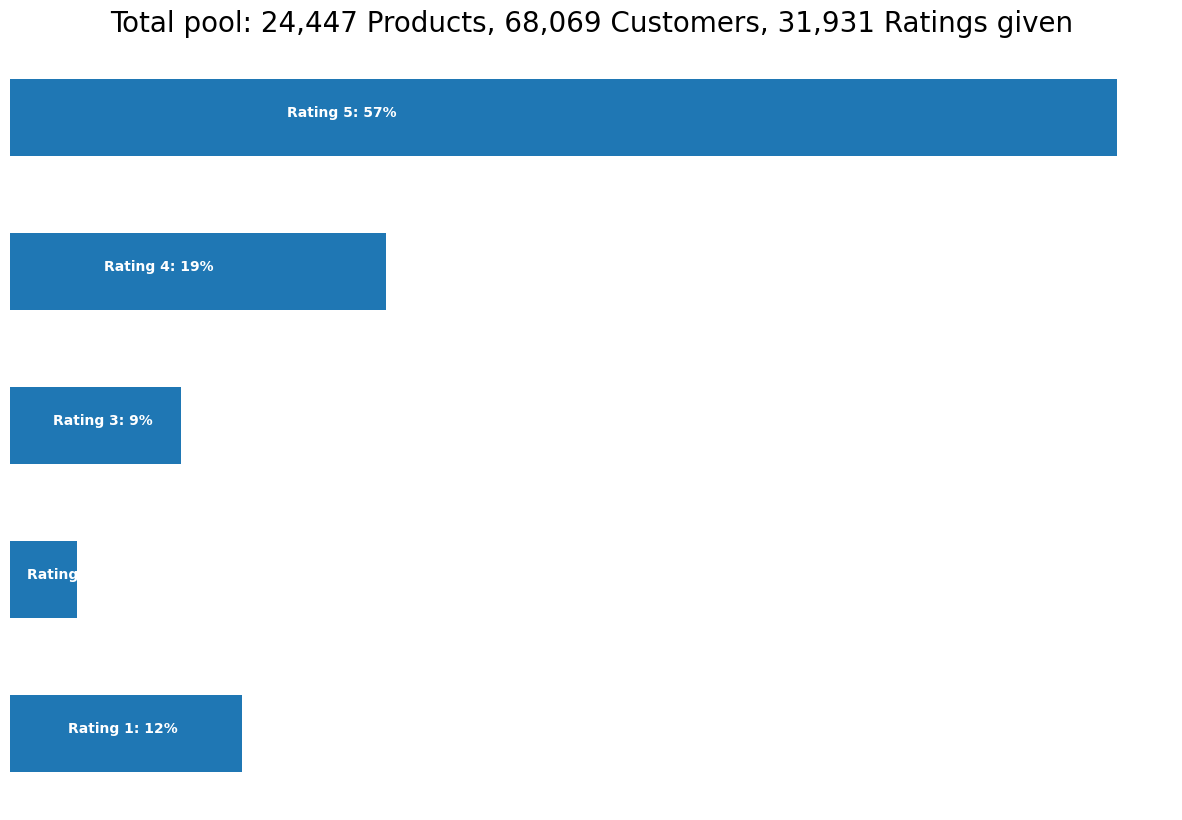

In [71]:
n=order_en.groupby('review_score')['review_score'].agg(['count'])
prod_count = order_en['product_id'].nunique()
cust_count=cust['customer_unique_id'].nunique() - prod_count
rating_count =order_en['review_score'].count()-cust_count

ax = n.plot(kind='barh', legend=False, figsize=(15, 10))
plt.title(
    'Total pool: {:,} Products, {:,} Customers, {:,} Ratings given'.format(
        prod_count, cust_count, rating_count),
    fontsize=20)
plt.axis('off')

for i in range(1, 6):
    ax.text(n.iloc[i - 1][0] / 4,
            i - 1,
            'Rating {}: {:.0f}%'.format(i,
                                        n.iloc[i - 1][0] * 100 / n.sum()[0]),
            color='white',
            weight='bold')

- As we can see, it is actually excellent to have 57% of the products is rated 5. However, the rate 1: 12% percentage is quite high compared to rate 2 and 3.

In [72]:
pop_product = pd.DataFrame(order_en.groupby('product_id')['review_score'].count())
most_popular = pop_product.sort_values('review_score',ascending=False)
most_popular.head(10)

,review_score
product_id,
99a4788cb24856965c36a24e339b6058,653
aca2eb7d00ea1a7b8ebd4e68314663af,615
422879e10f46682990de24d770e7f83d,475
d1c427060a0f73f6b889a5c7c61f2ac4,449
389d119b48cf3043d311335e499d9c6b,435
53759a2ecddad2bb87a079a1f1519f73,432
53b36df67ebb7c41585e8d54d6772e08,427
368c6c730842d78016ad823897a372db,380
2b4609f8948be18874494203496bc318,368


**Conclusion**

We can conclude from this analysis that product id: '99a4788cb24856965c36a24e339b6058' is the most popular product. I recommend for the company to:

Not promote this popular product frequently since it is already popular
Promote another product with low score of rating to attract customer with the produc

# **Main Focus: Product Recommendation System**

- We will recomend products if we input a product id this system will recomend products for customer.


In [74]:
order.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [75]:
order_rating = order.loc[:,['customer_id','product_id','review_score']]

In [76]:
order_rating = order_rating[order_rating['product_id'].isin(
    order_rating['product_id'].value_counts()[
        order_rating['product_id'].value_counts()>10].index
)]

In [77]:
order_rating = order_rating.reset_index()

In [78]:
# maling a matrix
rating_utility_matrix = order_rating.pivot_table(values='review_score',
                                                 index= 'customer_id',
                                                 columns='product_id',
                                                 fill_value = 0)
rating_utility_matrix.head()

product_id,001b72dfd63e9833e8c02742adf472e3,00250175f79f584c14ab5cecd80553cd,005030ef108f58b46b78116f754d8d38,008cff0e5792219fae03e570f980b330,00ba6d766f0b1d7b78a5ce3e1e033263,00baba5b58e274d0332a0c8a0a66f877,00de7f393d962717eeeb2d7131a40dba,00faa46f36261af8bbf3a4d37fa4841b,0110573bc9195aa810a4384f189f48f5,014a8a503291921f7b004a5215bb3c36,...,fe95eb948375116da759c8ef60295001,fe9dfbe7f974621789683b7b78be2a16,fecf6223a3494f35362f670e571d2a04,fed5c40c27e1c88560a9e92d82ee0825,feee7d52babf4002f100a79183eb7989,ff55834c0b3272853dfe62340f2bb91b,ff5f8606556b625613f069a5a9a48966,ff7fccf8513f360157f0660fe51d1d88,ffb97eb64c6fe1baada2410288c04457,ffc9caf33e2d1e9f44e3e06da19085f7
customer_id,,,,,,,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001dad3e429b2831bf4e392170a8e8c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00031a627dcb899baea17e751172bef3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000379cdec625522490c315e70c7a9fb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00038477de4e0f0ac327ae1dc2f273c3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
rating_utility_matrix.shape

(50012, 1651)

In [80]:
x=rating_utility_matrix.T
x.head()

customer_id,00012a2ce6f8dcda20d059ce98491703,0001dad3e429b2831bf4e392170a8e8c,00031a627dcb899baea17e751172bef3,000379cdec625522490c315e70c7a9fb,00038477de4e0f0ac327ae1dc2f273c3,0004164d20a9e969af783496f3408652,0004e8e0600daf29de26bd60b8feb007,000c88c401a87f064691b4bea3eb86b4,000e943451fc2788ca6ac98a682f2f49,000eac74d62085b7026a068cfa46b3e3,...,fff5169e583fd07fac9fec88962f189d,fff55ba8dffa552b6fdfd86c2e806459,fff5ca85c16ebb7e531dbd4a08756567,fff7466a253c0e59499ea943462c10f9,fff9b667c8b07d8f3a9b45e60cb16e20,fffbc3192c60df9a7434b4cb1695fb18,fffecc9f79fd8c764f843e9951b11341,ffff42319e9b2d713724ae527742af25,ffffa3172527f765de70084a7e53aae8,ffffdd34d58526db84c9eeb26bb38e4f
product_id,,,,,,,,,,,,,,,,,,,,,
001b72dfd63e9833e8c02742adf472e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00250175f79f584c14ab5cecd80553cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005030ef108f58b46b78116f754d8d38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
008cff0e5792219fae03e570f980b330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00ba6d766f0b1d7b78a5ce3e1e033263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
x.shape

(1651, 50012)

In [82]:
# using SVD
def fitsystemrecommendation(rating_utility_matrix):
  x=rating_utility_matrix.T
  SVD = TruncatedSVD(n_components=10)
  decomposed_matrix = SVD.fit_transform(x)
  correlation_matrix = np.corrcoef(decomposed_matrix)
  return correlation_matrix

In [83]:
correlation_matrix = fitsystemrecommendation(rating_utility_matrix)

In [84]:
def systemrecommendation(prod_id):
  order_rating.index[order_rating['product_id'] == prod_id].tolist()[1]
  product_names = list(x.index)
  product_id = product_names.index(prod_id)
  correlation_product_id = correlation_matrix[product_id]
  recommend = list(x.index[correlation_product_id > 0.70])
  recommend.remove(prod_id)
  return pd.DataFrame(recommend[0:9],columns=['recommendation'])

In [86]:
systemrecommendation('001b72dfd63e9833e8c02742adf472e3')

,recommendation
0,00250175f79f584c14ab5cecd80553cd
1,00ba6d766f0b1d7b78a5ce3e1e033263
2,016711f78a6a87696645db0a6a834826
3,06f0e85c7892d5df893f332706340af1
4,07fe9ffbb84b9d22610d79efb16e81a7
5,08c63555bbee955cad9c6a9feab9e9d4
6,09dbbe2c4f26cad4d560aea043f9632c
7,0a783d7ce18a37749c3a059cf829564b
8,0a8b35c2fbc824f7e1015cf330e6cc3c


- We can see the recommendation when we input product id: '001b72dfd63e9833e8c02742adf472e3'. By using the function I have defined, this recommendation have high correlation with the product. Therefore, I suggest the company to promote this recommendation product when the product inputted is purchased of viewed.

# **CONCLUSION**

- This recommendation system can be used by the company to promote the recommended product after the user purchase or interested with the currently viewed product. By conduct this kind of promotion, your company does not randomly promote product. On the other hand, the product promoted has high correlation. Therefore, the customer may purchased more since interest product appeared frequently.